# OkCupid's Date-A-Scientist

## Intro

In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance.

## Scoping

The **goal** of this project is to practice formulating questions and implementing Machine Learning techniques to answer those questions, potentially using NLP (Natural Language Processing), Supervised and Unsupervised ML.

The **data** is from OKCupid, an app that focuses on using multiple choice and short answers to match users. It was provided by <a href='https://www.codecademy.com/'>Codecademy</a> for the final project in the Machine Learning portion of the Data Scientist career path, in `profiles.csv`.

What **analysis** will we perform to acheive the project goals? 

- We can explore and visualize the data - What type of person uses OKCupid and how are they able to describe themselves within the parameters of the site?

- Can we use Machine Learning to fill in missing data? If we were using a dating app, what information about potential partners would be most important personally?  I might have allergies, or really love animals, and want to know if they had pets. 

We can wrap up by **evaluating** how well the model performed - Does it indicate we can answer the question(s) with any confidence?

## Initial setup

### Import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load data

In [2]:
df = pd.read_csv('profiles.csv')
pd.set_option('display.max_columns', None)

## Inspect the data

### Exploration

We'll start by looking at some basic information about the dataset. 
- The first few rows give us a sense of the information included and the format of the data
- We can see how many fields are may have missing data
- The range of the numeric information

In [3]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [5]:
df.isna().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

In [6]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


### Characteristics

On the OkCupid site, users are able to describe themselves through a series of drop-down menus, thankfully limiting variation in the data.  There are 10 essay fields where users give free-form answers. 

Looking at the first few rows of the dataset, despite the constraints in answers, there is some tidying that needs to be done. There are special characters that did not get parsed. The fields where answers are typed in give room for error, like we see with `age` and `height`, and there is html in the essay fields.

Based on the null values, it looks like `age`, `orientation`, `sex`, `location`, `income`, and `status` were required when creating an OKCupid profile. However, 80% of `income` answers are -1, so the "not-null" values are not as they seem, and therefore income is probably not required information. This will not be a feature to use for ML, as removing the null values will leave us with only 20% of the data.

Issues so far:
- Are there really 110 year olds on the site? Not that I'm judging, it's just *really* unlikely.
- The lowest height is 1 inch (2.54cm) (maybe a typo), and the highest is almost 8 feet (2.4m) (also, the 109 year old) (also, maybe a typo).

There are 60,000 user profiles in this dataset.

This data was collected in June of 2012. In 2013, OKCupid introduced 22 gender and 13 orientation options. The data we have is limited to `m`ales and `f`emales, and `straight`, `gay`, or `bisexual`.

In [7]:
df.loc[df['age'] == 110]

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
2512,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0,-1,NaN,2012-06-27-22-16,"daly city, california",NaN,straight,NaN,NaN,f,NaN,NaN,english,single


In [8]:
df.loc[df['age'] == 109]

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
25324,109,athletic,mostly other,NaN,never,working on masters program,NaN,NaN,NaN,nothing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,-1,student,2012-06-30-18-18,"san francisco, california",might want kids,straight,NaN,other and somewhat serious about it,m,aquarius but it doesn&rsquo;t matter,when drinking,english (okay),available


In [9]:
df['income'].value_counts()

income
-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: count, dtype: int64

In [10]:
df.loc[df['height'] == 1.0]

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
45959,36,NaN,NaN,very often,never,graduated from college/university,i'm a transplant from southern california with...,"living each day as if it'd be my last, and man...","writing, rambling, fixing anything thats break...","my otherwise perfect hair, my half-sleeve tatt...","i enjoy reading louis sachar, james burke, ala...",irish whiskey<br />\nbroadband internet<br />\...,"zombies, and ways not to get eaten by them.<br...",peering through the bottom of a whiskey glass....,"i can't stand online dating, or the stigma att...",if you're a ninja (with skills) or a pirate. y...,NaN,1.0,80000,science / tech / engineering,2012-06-28-14-18,"oakland, california",NaN,straight,likes dogs and has cats,judaism and laughing about it,m,leo and it&rsquo;s fun to think about,when drinking,"english (fluently), c++ (fluently), hebrew (po...",single


## Clean data

There is html in many of the **essay** fields, as well as special characters (eg `\&rsquo;` for a single quote `'`) in other fields, that will need to be removed.

Inspecting the two outliers for **age** (109 and 110), shows one is a typical entry and the other is mostly empty. We will keep those. Those two data points should have minimal effect on our ML model.

Inspecting outliers for **height** (eg, 3 or 4 inches) shows full profiles, so the outliers may be typos, and the data can be included. Based on my experience in the world, height is not an indicator for whether people have pets.

We will replace the `-1` **income** with `NaN`s, or null values, and use regex to remove special characters. 

Unfortunately, it looks like all the capital letters were converted to lower case. We will be using Vader Sentiment Analysis, which takes into account capital letters used to emphasize words. It would be interesting to be able to take those into account.

In [11]:
# replace special characters
df.replace(r"&amp;", "&", regex=True, inplace=True)
df.replace(r"&rsquo;", "'", regex=True, inplace=True)

# replace html
df.replace(r"<[^<>]*>", " ", regex=True, inplace=True)
df.replace(r"https?://", " ", regex=True, inplace=True)

#replace \n
df.replace(r"\n", " ", regex=True, inplace=True)

In [12]:
# replace -1 income with NaN (null values)
df['income'].replace(-1, np.nan, inplace=True)

In [13]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,11504.000000
mean,32.340290,68.295281,104394.993046
std,9.452779,3.994803,201433.528307
min,18.000000,1.000000,20000.000000
25%,26.000000,66.000000,20000.000000
50%,30.000000,68.000000,50000.000000
75%,37.000000,71.000000,100000.000000
max,110.000000,95.000000,1000000.000000


## Data viz

What types of people used OkCupid in 2012?

### Numeric data

Let's take a look at the numeric data, or the fields where users entered numbers.
- **Age** - look at the range between 20 and 70 to get a general sense of the data
- **Height** - look between 55" and 80" (4'6" and 6'7") as above
- **Income**  

### Age

The average age of OKCupid users in this dataset is 32, the most frequent age group is 25-30 year olds.

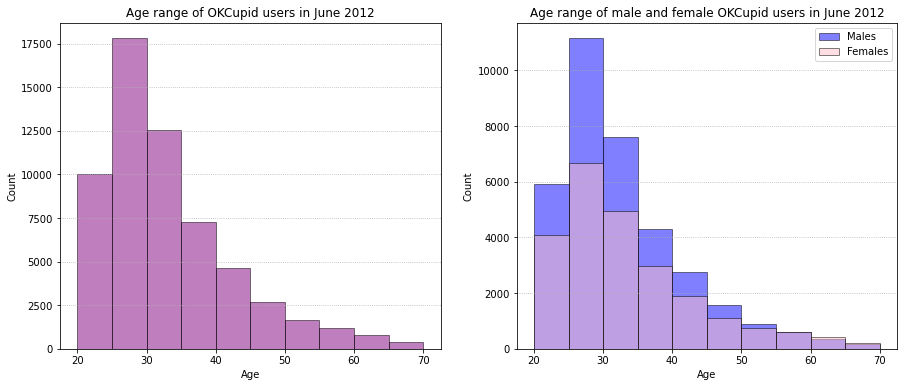

In [14]:
fig = plt.subplots(1,2, figsize=(15,6))
plt.subplot(1, 2, 1)
plt.hist(df['age'], range=(20, 70), color='purple', edgecolor='black', alpha=0.5)
plt.title('Age range of OKCupid users in June 2012')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle=':')

plt.subplot(1, 2, 2)
plt.hist(df[df['sex'] == 'm']['age'], range=(20, 70), color='blue', edgecolor='black', alpha=0.5, label='Males')
plt.hist(df[df['sex'] == 'f']['age'], range=(20, 70), color='pink', edgecolor='black', alpha=0.5, label='Females')
plt.title('Age range of male and female OKCupid users in June 2012')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle=':')
plt.legend()
plt.show()

To tease out the the difference in the over-60 group between males and females, I used a kde plot. It looks like there are slightly more females over the age of 50 on the site than males.

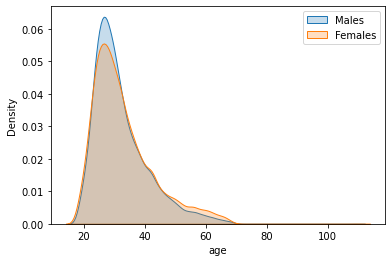

In [15]:
sns.kdeplot(df[df['sex'] =='m']['age'], fill=True, label='Males')
sns.kdeplot(df[df['sex'] =='f']['age'], fill=True, label='Females')
plt.legend()
plt.show()

### Height

The average height is 68" or 5'7" (173cm), The most frequent height of all users is about 5'8", or 178cm. Most men are 5'9" or 180cm, and most women are 5'3" or 163cm.

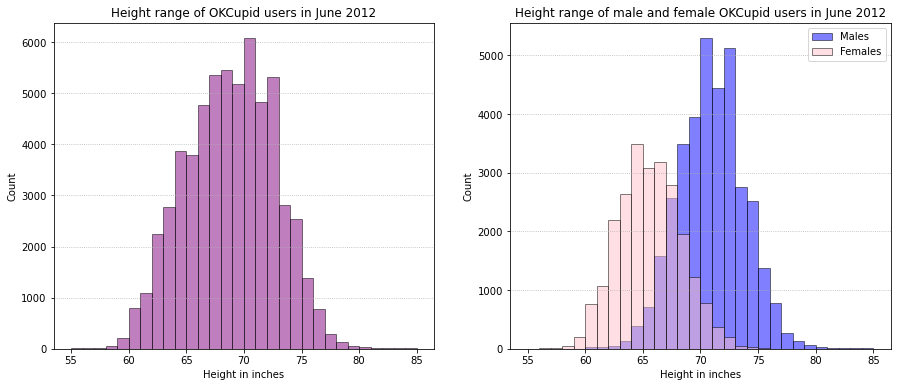

In [16]:
fig = plt.subplots(1,2, figsize=(15,6))
plt.subplot(1, 2, 1)
plt.hist(df['height'], range=(55, 85), bins=30, color='purple', edgecolor='black', alpha=0.5)
plt.title('Height range of OKCupid users in June 2012')
plt.xlabel('Height in inches')
plt.ylabel('Count')
plt.grid(axis='y', linestyle=':')

plt.subplot(1, 2, 2)
plt.hist(df[df['sex'] == 'm']['height'], range=(55, 85), bins=30, color='blue', edgecolor='black', alpha=0.5, label='Males')
plt.hist(df[df['sex'] == 'f']['height'], range=(55, 85), bins=30, color='pink', edgecolor='black', alpha=0.5, label='Females')
plt.title('Height range of male and female OKCupid users in June 2012')
plt.xlabel('Height in inches')
plt.ylabel('Count')
plt.grid(axis='y', linestyle=':')
plt.legend()
plt.show()

### Income

Only 20% of OkCupid users filled in the **income** field. In order to better see the comparison in values, we can use a log scale. The average salary is about \\$105k, but you can see the most users' income is below \$100k.  Because so few people filled out this info, we will not use it in our Machine Learning model.

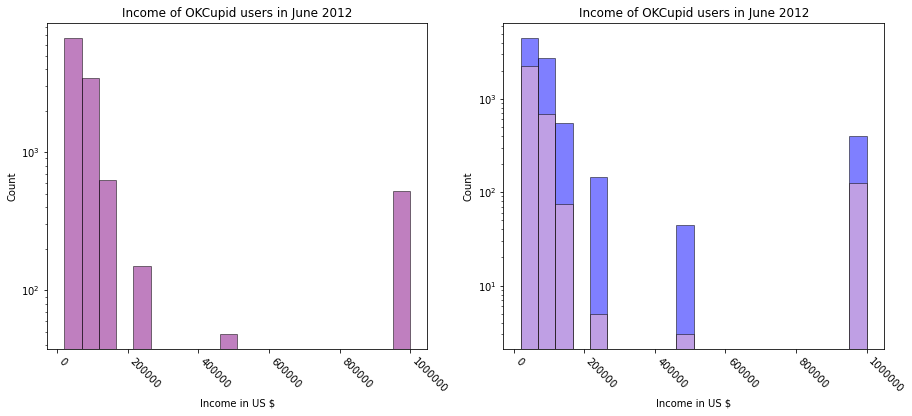

In [17]:
fig = plt.subplots(1,2, figsize=(15,6))
plt.subplot(1, 2, 1)
plt.hist(df['income'], bins=20, color='purple', edgecolor='black', alpha=0.5, log=True)
plt.title('Income of OKCupid users in June 2012')
plt.xlabel('Income in US $')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=-45, ha='left')

plt.subplot(1, 2, 2)
plt.hist(df[df['sex'] == 'm']['income'], bins=20, color='blue', edgecolor='black', alpha=0.5, log=True, label='Males')
plt.hist(df[df['sex'] == 'f']['income'], bins=20, color='pink', edgecolor='black', alpha=0.5, log=True, label='Females')
plt.title('Income of OKCupid users in June 2012')
plt.xlabel('Income in US $')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=-45, ha='left')
plt.show()

### Categorical Data

### What is the Sex and Orientation of OkCupid users?

There are 60% males and 40% females in this OkCupid data, and the majority of users are straight, however there are more bisexual women on the site than men.

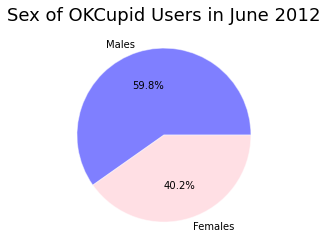

In [18]:
sex_counts = df['sex'].value_counts()
fig, ax = plt.subplots()
labels = 'Males', 'Females'
ax.pie(sex_counts.values, labels=labels, colors=['blue', 'pink'], wedgeprops=dict(edgecolor='w', alpha=0.5), autopct='%1.1f%%')
plt.title('Sex of OKCupid Users in June 2012', fontsize=18)
plt.show()


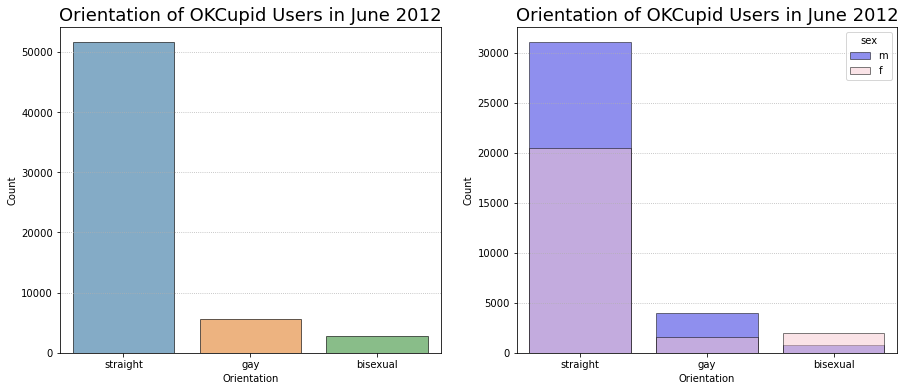

In [19]:
fig = plt.subplots(1,2, figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='orientation', order=df['orientation'].value_counts().index, edgecolor='black', alpha=0.6)
plt.xlabel('Orientation')
plt.ylabel('Count')
plt.title('Orientation of OKCupid Users in June 2012', fontsize=18)
plt.grid(axis='y', linestyle=':')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='orientation', hue='sex', order=df['orientation'].value_counts().index, palette={'f':'pink', 'm':'blue'}, dodge=False, edgecolor='black', alpha=0.5)
plt.xlabel('Orientation')
plt.ylabel('Count')
plt.title('Orientation of OKCupid Users in June 2012', fontsize=18)
plt.grid(axis='y', linestyle=':')

plt.show()

### Are people available?

As expected for a dating site, most (96%) people are single/available, so we won't use that feature to predict if a person has pets.

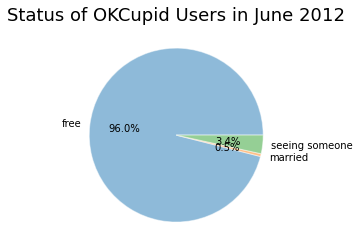

In [20]:
df_copy = df.copy()
df_copy['status'] = df_copy['status'].replace({'single':'free', 'available':'free'})
df_copy = df_copy[df_copy['status'] != 'unknown']
status_counts = df_copy.groupby ('status').size()
# status_counts = df['status'].value_counts()
fig, ax = plt.subplots()
ax.pie(status_counts.values, labels=status_counts.index, wedgeprops=dict(edgecolor='w', alpha=0.5), autopct='%1.1f%%')
plt.title('Status of OKCupid Users in June 2012', fontsize=18)
plt.show()

### How diverse is OkCupid?

About 90% of the profiles include ethnicity data, and of those, 60% are white. The next highest ethnicity is Asian at 11%. There are enough users who indicated more than one ethnicity that plotting the information resulted in a chart too large to fit on my screen. We will keep this information in mind when we get to the modeling stage.

In [21]:
df['ethnicity'].value_counts()[0:5]

ethnicity
white               32831
asian                6134
hispanic / latin     2823
black                2008
other                1706
Name: count, dtype: int64

### And what languages do they speak?

Several users are multilingual, however all responses included "english". This indicates language will not affect whether or not someone owns pets.

In [22]:
english_speakers = df['speaks'].str.contains("english")
value_count = english_speakers.sum()
print(value_count)

59896


In [23]:
df['speaks'].value_counts().sum()

59896

### What level of Education do users have?

Most users of both sexes have either an undergraduate or graduate degree. 

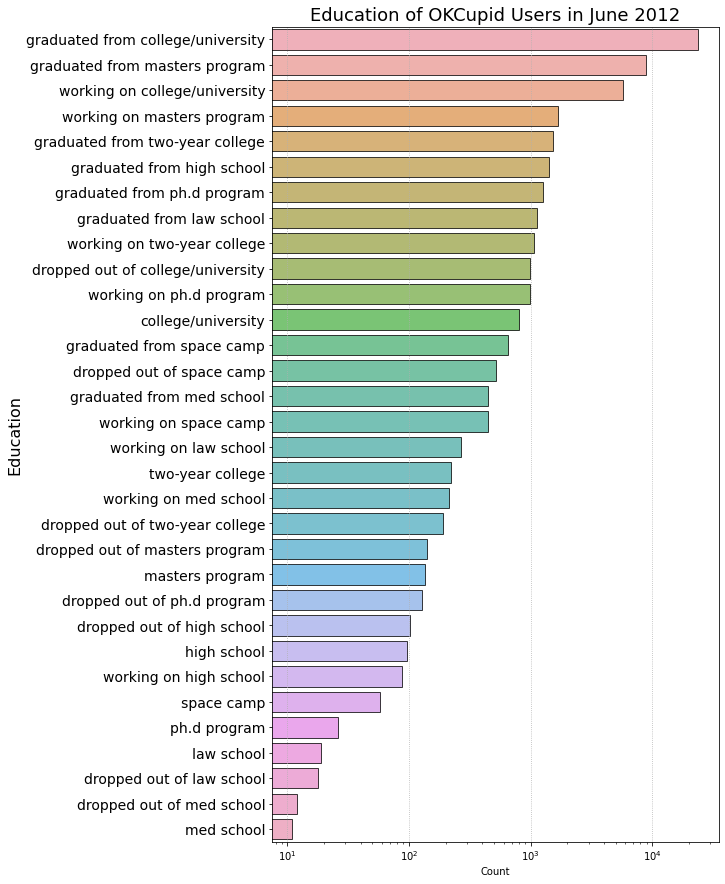

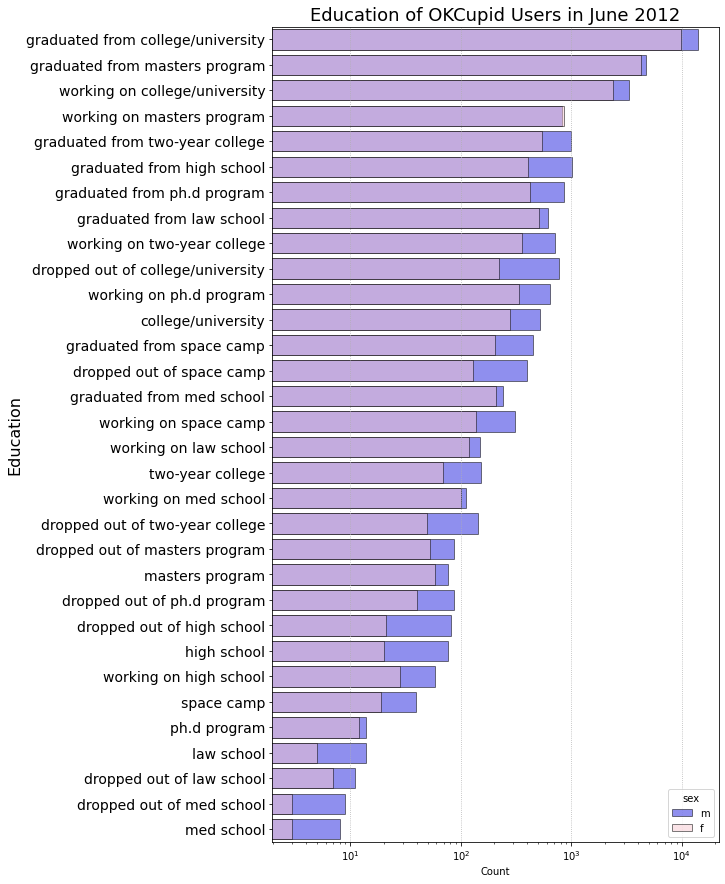

In [24]:
plt.figure(figsize=(8, 15))
sns.countplot(data=df, y='education', order=df['education'].value_counts().index, edgecolor='black', alpha=0.75, log=True)
plt.ylabel('Education', fontsize=16)
plt.xlabel('Count')
plt.yticks(fontsize=14)
plt.title('{} of OKCupid Users in June 2012'.format('Education'), fontsize=18)
plt.grid(axis='x', linestyle=':')

plt.figure(figsize=(8, 15))
sns.countplot(data=df, y='education', hue='sex', order=df['education'].value_counts().index, dodge=False, palette={'f':'pink', 'm':'blue'}, edgecolor='black', alpha=0.5, log=True)
plt.ylabel('Education', fontsize=16)
plt.xlabel('Count')
plt.yticks(fontsize=14)
plt.title('{} of OKCupid Users in June 2012'.format('Education'), fontsize=18)
plt.grid(axis='x', linestyle=':')
plt.show()

### What do OkCupid users do for work?

Understandably, with the variety of jobs and careers, the most amount of people list their occupation as "other". It is interesting to note the "science/tech/engineering", "computer/hardware/software", and "construction/craftsmanship" work is attributed to more males, and the "medicine/health", "education/academia", and "clerical/administrative" work is attributed to more females. A narrower gap occurs in the "law/legal services" sector, and in the previous education visualization, "graduated from law school" has a smaller difference between the sexes, as well.

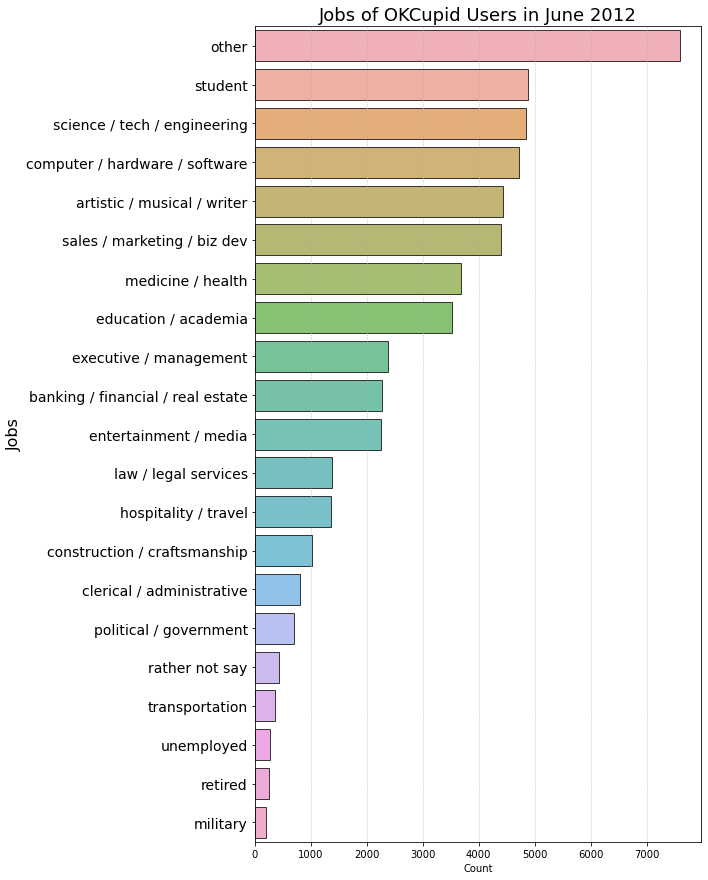

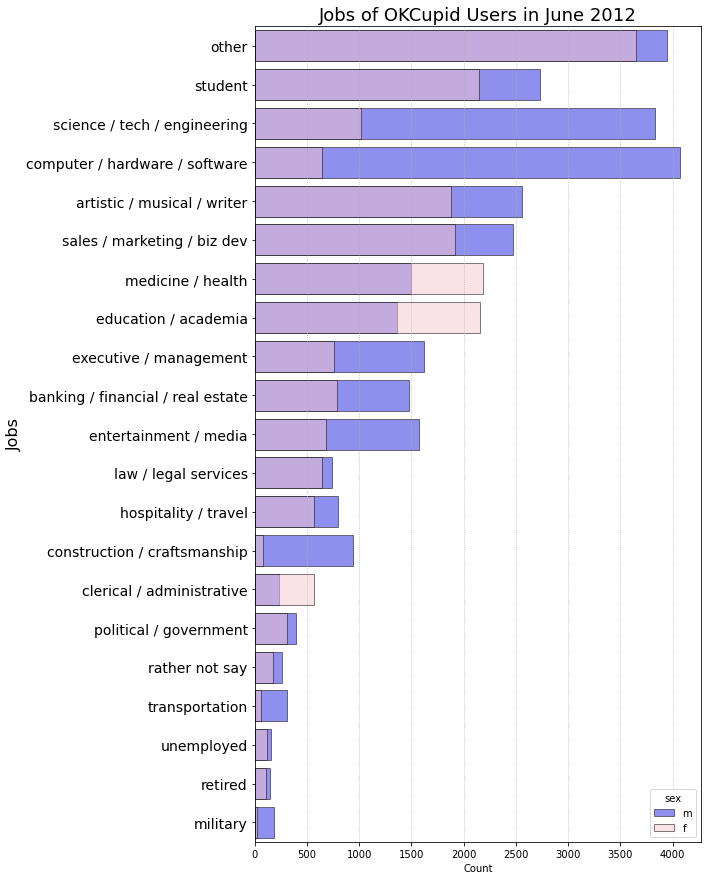

In [25]:
plt.figure(figsize=(8, 15))

sns.countplot(data=df, y='job', order=df['job'].value_counts().index, edgecolor='black', alpha=0.75)
plt.ylabel('Jobs', fontsize=16)
plt.xlabel('Count')
plt.yticks(fontsize=14)
plt.title('{} of OKCupid Users in June 2012'.format('Jobs'), fontsize=18)
plt.grid(axis='x', linestyle=':')

plt.figure(figsize=(8, 15))
sns.countplot(data=df, y='job', hue='sex', order=df['job'].value_counts().index, palette={'f':'pink', 'm':'blue'}, edgecolor='black',  dodge=False, alpha=0.5)
plt.ylabel('Jobs', fontsize=16)
plt.xlabel('Count')
plt.yticks(fontsize=14)
plt.title('{} of OKCupid Users in June 2012'.format('Jobs'), fontsize=18)
plt.grid(axis='x', linestyle=':')
plt.show()

### Location, Location, *Location*, or where do people live?

Almost all (99%) of the users live in California in the US, and of those, about half live in the city of San Fransisco.

In [26]:
# split out the city and state in the location to make an easier to read chart for location
# there are apparently multiple commas in the locations, hence the n=1 to split on the first occurance
# only, otherwise we get ValueError: Columns must be same length as key.
df[['city', 'state']] = df['location'].str.split(',', expand=True, n=1).fillna('Unknown')

In [27]:
cali = 59855
sanfran = 31064
total = 59946
cali_per = round((cali/total) * 100, 1)
sf_per = round((sanfran/cali) * 100, 1)
print(str(cali_per) + '% of users live in California, and of those, ' + str(sf_per) + '% live in San Fransisco.')

99.8% of users live in California, and of those, 51.9% live in San Fransisco.


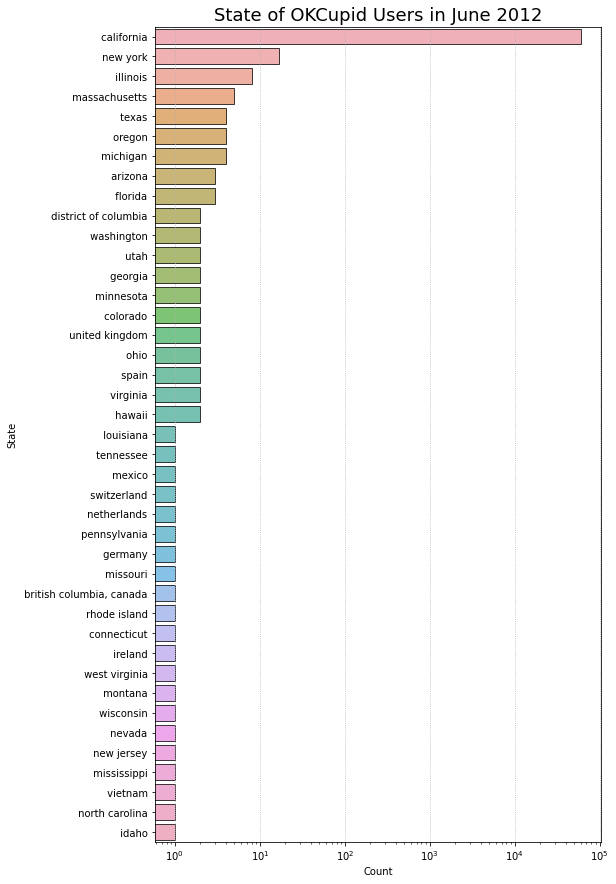

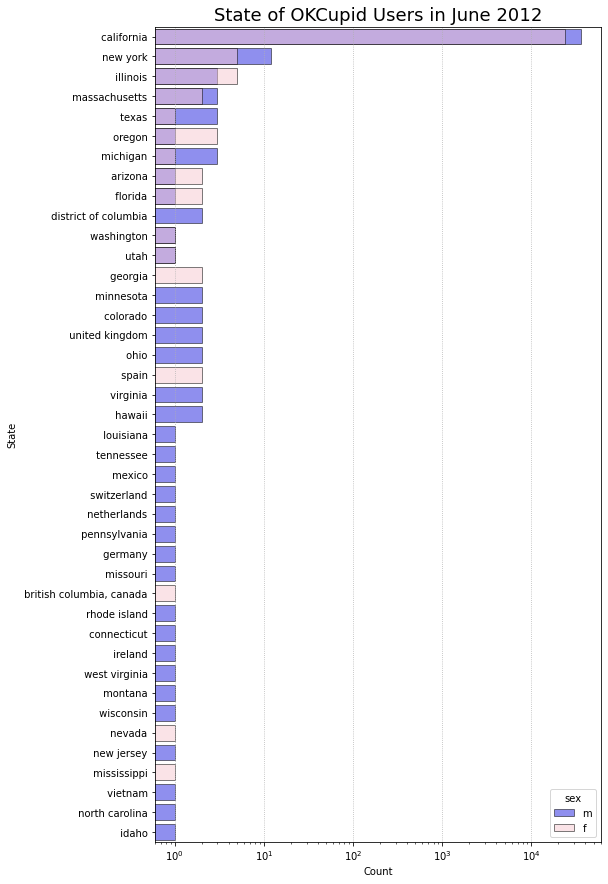

In [28]:
# California is by far the most represented state, so use a log to get a better sense of the smaller 
# distributions. 
plt.figure(figsize=(8, 15))
sns.countplot(data=df, y='state', order=df['state'].value_counts().index, log=True, edgecolor='black', alpha=0.75)
plt.ylabel('State')
plt.xlabel('Count')
plt.title('{} of OKCupid Users in June 2012'.format('State'), fontsize=18)
plt.grid(axis='x', linestyle=':')

plt.figure(figsize=(8, 15))
sns.countplot(data=df, y='state', hue='sex', order=df['state'].value_counts().index, log=True, palette={'f':'pink', 'm':'blue'}, edgecolor='black',  dodge=False, alpha=0.5)
plt.ylabel('State')
plt.xlabel('Count')
plt.title('{} of OKCupid Users in June 2012'.format('State'), fontsize=18)
plt.grid(axis='x', linestyle=':')
plt.show()

### How much Recreational Substance use is there?

The majority of users drink socially, never do drugs, and don't smoke.  These proportions for males and females were similar.

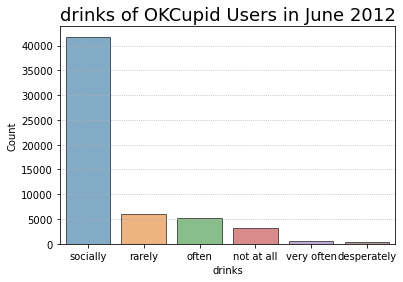

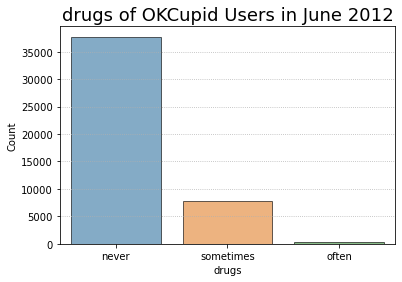

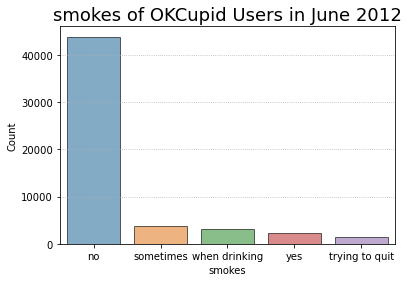

In [29]:
cols_to_plot_dds = ['drinks', 'drugs', 'smokes']

for col in cols_to_plot_dds:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, edgecolor='black', alpha=0.6)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('{} of OKCupid Users in June 2012'.format(col), fontsize=18)
    plt.grid(axis='y', linestyle=':')
    plt.show()

### How do users see themselves?

Most users say they are "average", "fit", or "athletic".  More women describe themselves as "curvy" or "full figured", where more men describe themselves as "athletic".

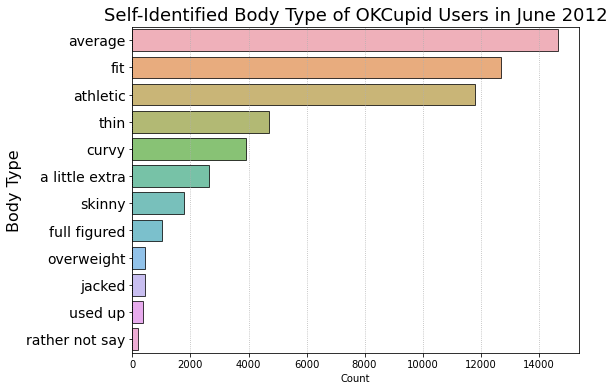

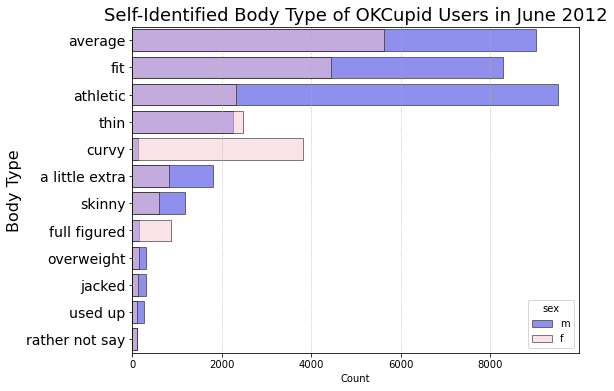

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='body_type', order=df['body_type'].value_counts().index, edgecolor='black', alpha=0.75)
plt.ylabel('Body Type', fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel('Count')
plt.title('Self-Identified Body Type of OKCupid Users in June 2012', fontsize=18)
plt.grid(axis='x', linestyle=':')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='body_type', hue='sex', order=df['body_type'].value_counts().index, edgecolor='black', palette={'f':'pink', 'm':'blue'}, dodge=False, alpha=0.5)
plt.ylabel('Body Type', fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel('Count')
plt.title('Self-Identified Body Type of OKCupid Users in June 2012', fontsize=18)
plt.grid(axis='x', linestyle=':')
plt.show()

### Who else is in their lives?

The majority of users don't have kids, followed by an indication that they want or might want them. More women want kids or already have them than men. 

Most people like dogs and cats, with more people liking dogs. Women seem to have cats at a higher rate than men, but also have more range in responses as to whether they like cats or not.

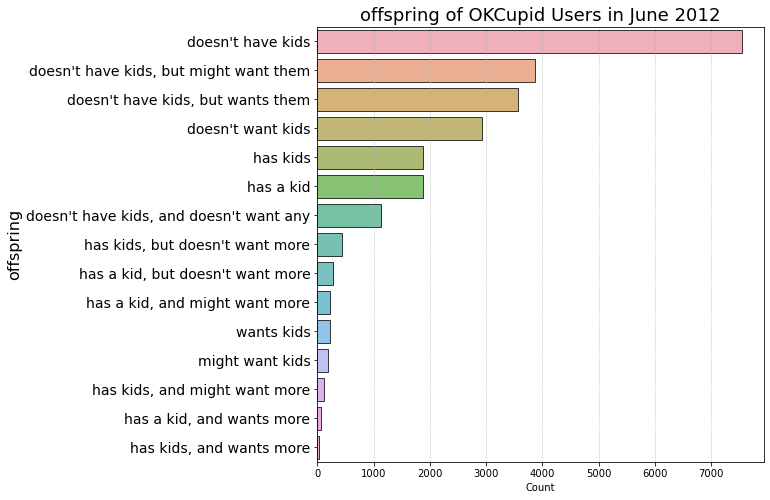

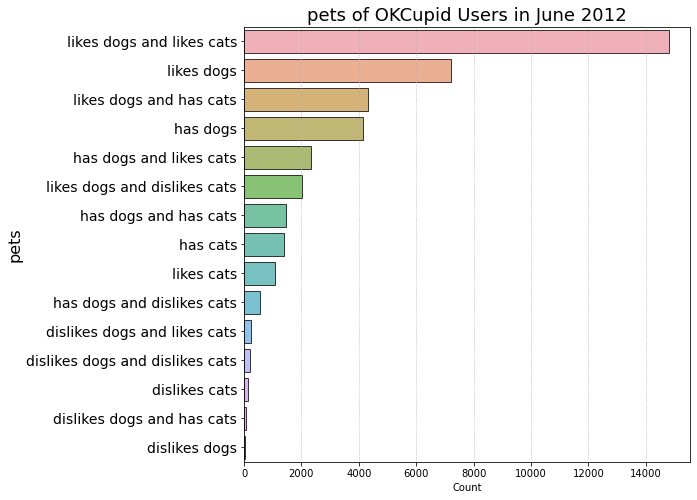

In [31]:
cols_op = ['offspring', 'pets']

for col in cols_op:
    plt.figure(figsize=(8, 8))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, edgecolor='black', alpha=0.75)
    plt.ylabel(col, fontsize=16)
    plt.xlabel('Count')
    plt.yticks(fontsize=14)
    plt.title('{} of OKCupid Users in June 2012'.format(col), fontsize=18)
    plt.grid(axis='x', linestyle=':')
    plt.show()

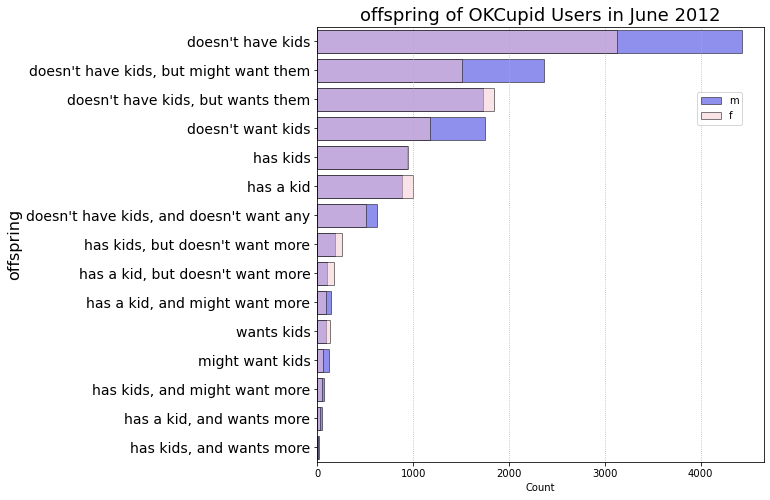

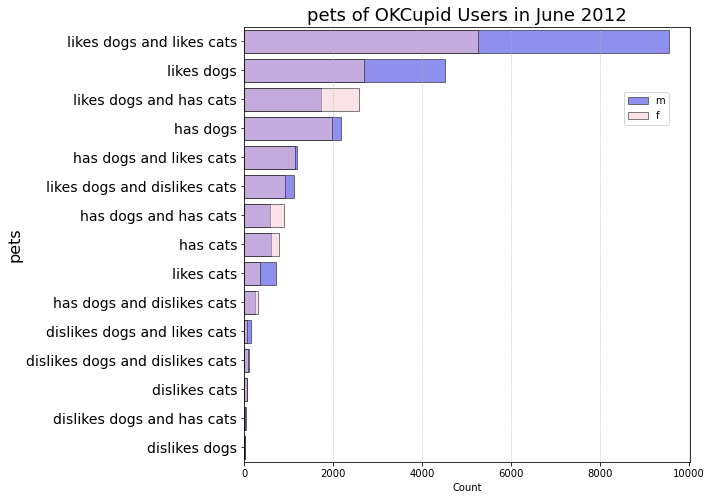

In [32]:
for col in cols_op:
    plt.figure(figsize=(8, 8))
    sns.countplot(data=df, y=col, hue='sex', order=df[col].value_counts().index, palette={'f':'pink', 'm':'blue'}, edgecolor='black', dodge=False, alpha=0.5)
    plt.ylabel(col, fontsize=16)
    plt.xlabel('Count')
    plt.yticks(fontsize=14)
    plt.title('{} of OKCupid Users in June 2012'.format(col), fontsize=18)
    plt.legend(bbox_to_anchor=(.85, 0.85), loc='upper left', borderaxespad=0)
    plt.grid(axis='x', linestyle=':')
    plt.show()

## Data prep

We will work on filling in some missing values and getting the data into a form that works for ML.

To gauge the sentiment of users, and to see if that affects pet ownership, we will use the essay fields where people can talk about themselves free-form.

In order to use NLP on the essays, it would be more convenient to have them combined for each user into one collection.  As we saw, 91% of users filled out the first essay. That dropped off for the subsequent essay fields. So we need to avoid NaNs (or null values) when combining the fields, and we will replace the NaNs with spaces.

In [33]:
# create a list of the essay column names
# essay0 - essay9
essays = list(map(lambda i: 'essay{}'.format(i), range(0, 10)))

# replace NaN with spaces
df[essays] = df[essays].fillna('')

# combine essays into one column
df['bios'] = df[essays].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [34]:
df['bios'][3]

'i work in a library and go to school. . . reading things written by old dead people playing synthesizers and organizing books according to the library of congress classification system socially awkward but i do my best bataille, celine, beckett. . .  lynch, jarmusch, r.w. fassbender. . .  twin peaks & fishing w/ john  joy division, throbbing gristle, cabaret voltaire. . .  vegetarian pho and coffee  cats and german philosophy   you feel so inclined.'

In [35]:
df['bios'][7895]

'         '

Above are examples of most essay fields filled out, and then not filled out at all.

### Organizing the pet data

Since we're interested in predicting whether people have pets, getting that data in a useable format is what we'll work on next.  I'm interested in distilling the pet data down to basics like "likes dogs" or "has cats", just to satisfy my personal curiosity. So we'll do that, look at it, then distill it down even further to whether people do or don't have pets.

In [36]:
# create a separate data frame for pets.

pets_df = pd.get_dummies(data=df, columns=['pets'], dtype=int)

In [37]:
# playing around with pet combinations. Probably the clunkiest code I've written.
# If anyone has a better way to do this, ie a iteration or function, please let me know.

pets_df['pets_likes dogs'] += pets_df['pets_likes dogs and likes cats']
pets_df['pets_likes dogs'] += pets_df['pets_likes dogs and has cats']
pets_df['pets_likes dogs'] += pets_df['pets_likes dogs and dislikes cats']

pets_df['pets_likes cats'] += pets_df['pets_likes dogs and likes cats']
pets_df['pets_likes cats'] += pets_df['pets_has dogs and likes cats']
pets_df['pets_likes cats'] += pets_df['pets_dislikes dogs and likes cats']

pets_df['pets_has dogs'] += pets_df['pets_has dogs and likes cats']
pets_df['pets_has dogs'] += pets_df['pets_has dogs and has cats']
pets_df['pets_has dogs'] += pets_df['pets_has dogs and dislikes cats']

pets_df['pets_has cats'] += pets_df['pets_likes dogs and has cats']
pets_df['pets_has cats'] += pets_df['pets_has dogs and has cats']
pets_df['pets_has cats'] += pets_df['pets_dislikes dogs and has cats']

pets_df['pets_dislikes dogs'] += pets_df['pets_dislikes dogs and likes cats']
pets_df['pets_dislikes dogs'] += pets_df['pets_dislikes dogs and dislikes cats']
pets_df['pets_dislikes dogs'] += pets_df['pets_dislikes dogs and has cats']

pets_df['pets_dislikes cats'] += pets_df['pets_likes dogs and dislikes cats']
pets_df['pets_dislikes cats'] += pets_df['pets_has dogs and dislikes cats']
pets_df['pets_dislikes cats'] += pets_df['pets_dislikes dogs and dislikes cats']

In [38]:
# drop columns

pets_df.drop(['pets_likes dogs and likes cats', 
           'pets_likes dogs and has cats', 
           'pets_likes dogs and dislikes cats', 
           'pets_has dogs and likes cats', 
           'pets_has dogs and has cats', 
           'pets_has dogs and dislikes cats', 
           'pets_dislikes dogs and likes cats', 
           'pets_dislikes dogs and dislikes cats', 
           'pets_dislikes dogs and has cats'], axis=1, inplace=True)

In [39]:
# rename columns
pets_df.rename(columns={'pets_dislikes cats': 'dislikes cats', 
                     'pets_dislikes dogs': 'dislikes dogs', 
                     'pets_has cats': 'has cats',
                     'pets_has dogs': 'has dogs', 
                     'pets_likes cats': 'likes cats', 
                     'pets_likes dogs': 'likes dogs'},
    inplace=True)

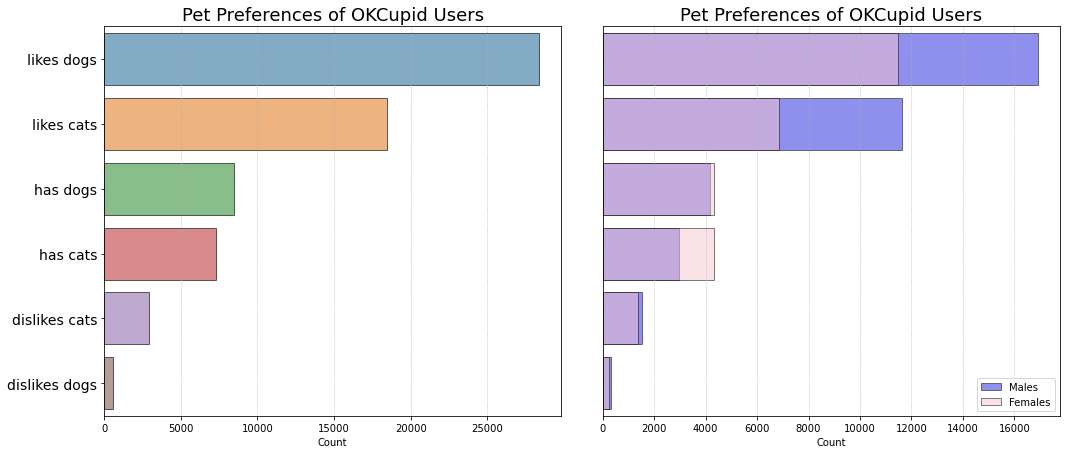

In [40]:
pet_cols = ['dislikes cats', 'dislikes dogs', 'has cats', 'has dogs', 'likes cats',
       'likes dogs']

# plot the pet preferences 
fig = plt.subplots(1,2, figsize=(14, 6))
plt.tight_layout()
plt.subplot(1, 2, 1)
# plt.figure(figsize=(8, 8))
s = pd.Series(pets_df[pet_cols].sum().sort_values(ascending=False))
sns.barplot(x=s.values, y=s.index, edgecolor='black', alpha=0.6)
plt.xlabel('Count')
plt.yticks(fontsize=14)
plt.title('Pet Preferences of OKCupid Users', fontsize=18)
plt.grid(axis='x', linestyle=':')

plt.subplot(1, 2, 2)
# plt.figure(figsize=(8, 8))
s_m = pd.Series(pets_df[pets_df['sex'] == 'm'][pet_cols].sum().sort_values(ascending=False))
s_f = pd.Series(pets_df[pets_df['sex'] == 'f'][pet_cols].sum().sort_values(ascending=False))
sns.barplot(x=s_m.values, y=s_m.index, color='blue', edgecolor='black', alpha=0.5, label='Males')
sns.barplot(x=s_f.values, y=s_f.index, color='pink', edgecolor='black', alpha=0.5, label='Females')
plt.xlabel('Count')
plt.yticks([], [])
plt.title('Pet Preferences of OKCupid Users', fontsize=18)
plt.grid(axis='x', linestyle=':')
plt.legend()
plt.show()

It looks like some of the trends we noticed earlier are confirmed: More women are pet owners in this dataset.

Now we'll separate this information in to a column for has pets, with `1` meaning "yes", and `0` meaning "no".

In [41]:
# create final dataframe.
df_cleaned = df

# add the "has" columns to the cleaned dataframe
df_cleaned['has dogs'] = pets_df['has dogs']
df_cleaned['has cats'] = pets_df['has cats']

# assign the values from the "has" columns to a new "has_pets" column, drop them, and rename.
df_cleaned = df_cleaned.assign(has_pets=df_cleaned['has dogs'] + df_cleaned['has cats'])
df_cleaned = df_cleaned.drop(columns=['has dogs', 'has cats'])
df_cleaned.rename(columns={'has_pets': 'has pets'}, inplace=True)

### Organizing the data that has qualifiers

In the drop down menus on the OkCupid site, people can choose categories with qualifiers, such as in  how serious they are about it. We will clean the `religion`, `sign`, and `diet` to drop the qualifiers, which will help decrease the amount of data included in our models.

In [42]:
# clean the religion, sign, and diet
# drop the na's
# Put into new dataframe df_cleaned

df_cleaned['religion'] = df_cleaned['religion'].apply(lambda x: str(x).split()[0])
df_cleaned['sign'] = df_cleaned['sign'].apply(lambda x: str(x).split()[0])
df_cleaned['diet'] = df_cleaned['diet'].apply(lambda x: str(x).split()[-1])
df_cleaned.replace('nan', np.nan, inplace=True)

### Religion

The top three categories in religion are "agnosticism", "other", and "atheism". When separated out for males and females, more females tend to be religious.

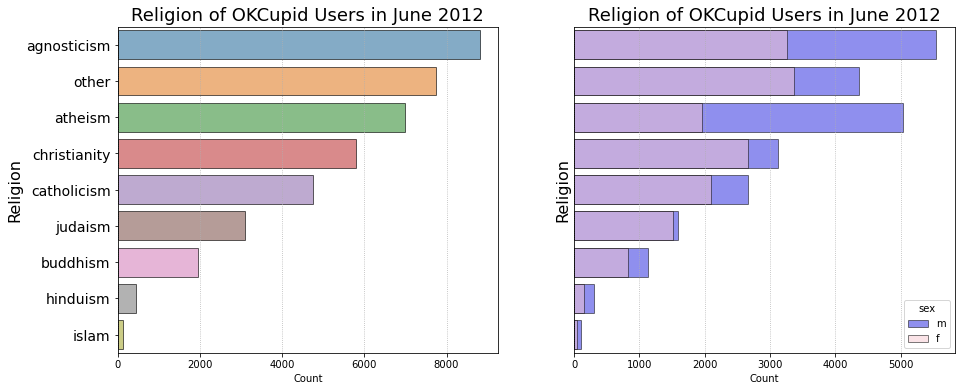

In [43]:
fig = plt.subplots(1,2, figsize=(15, 6))
plt.subplot(1, 2, 1)
# plt.figure(figsize=(8, 10))
sns.countplot(data=df_cleaned, y='religion', order=df_cleaned['religion'].value_counts().index, edgecolor='black', alpha=0.6)
plt.ylabel('Religion', fontsize=16)
plt.xlabel('Count')
plt.yticks(fontsize=14)
plt.title('{} of OKCupid Users in June 2012'.format('Religion'), fontsize=18)
plt.grid(axis='x', linestyle=':')

plt.subplot(1, 2, 2)
sns.countplot(data=df_cleaned, y='religion', hue='sex', order=df_cleaned['religion'].value_counts().index, palette={'f':'pink', 'm':'blue'}, edgecolor='black', dodge=False, alpha=0.5)
plt.ylabel('Religion', fontsize=16)
plt.xlabel('Count')
plt.yticks([], [])
plt.title('{} of OKCupid Users in June 2012'.format('Religion'), fontsize=18)
plt.grid(axis='x', linestyle=':')
plt.show()


### Signs

We would expect that astrological signs are pretty evenly distributed, since people are born all throughout the year.

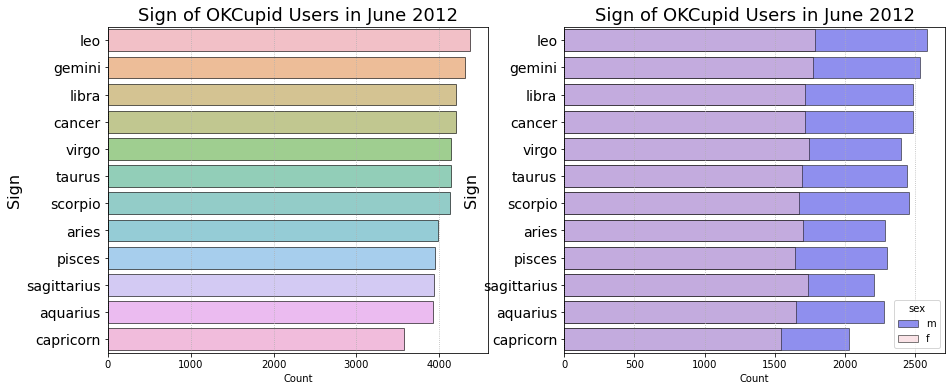

In [44]:
fig = plt.subplots(1,2, figsize=(15, 6))
plt.subplot(1, 2, 1)
# plt.figure(figsize=(8, 10))
sns.countplot(data=df_cleaned, y='sign', order=df_cleaned['sign'].value_counts().index, edgecolor='black', alpha=0.6)
plt.ylabel('Sign', fontsize=16)
plt.xlabel('Count')
plt.yticks(fontsize=14)
plt.title('{} of OKCupid Users in June 2012'.format('Sign'), fontsize=18)
plt.grid(axis='x', linestyle=':')

plt.subplot(1, 2, 2)
# plt.figure(figsize=(8, 10))
sns.countplot(data=df_cleaned, y='sign', hue='sex', order=df_cleaned['sign'].value_counts().index, palette={'f':'pink', 'm':'blue'}, edgecolor='black', dodge=False, alpha=0.5)
plt.ylabel('Sign', fontsize=16)
plt.xlabel('Count')
plt.yticks(fontsize=14)
plt.title('{} of OKCupid Users in June 2012'.format('Sign'), fontsize=18)
plt.grid(axis='x', linestyle=':')
plt.show()

### Diet

Most people will eat anything.  That makes dating a little easier! More women are vegatarians than men. 

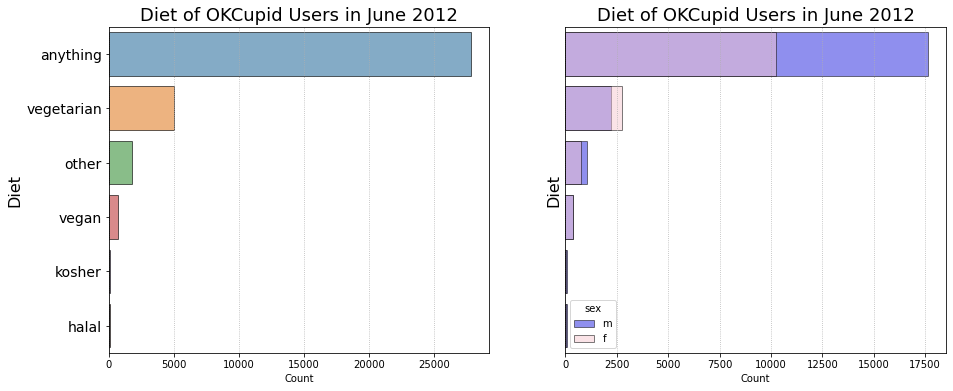

In [45]:
fig = plt.subplots(1,2, figsize=(15, 6))
plt.subplot(1, 2, 1)
# plt.figure(figsize=(8, 10))
sns.countplot(data=df_cleaned, y='diet', order=df_cleaned['diet'].value_counts().index, edgecolor='black', alpha=0.6)
plt.ylabel('Diet', fontsize=16)
plt.xlabel('Count')
plt.yticks(fontsize=14)
plt.title('{} of OKCupid Users in June 2012'.format('Diet'), fontsize=18)
plt.grid(axis='x', linestyle=':')

plt.subplot(1, 2, 2)
sns.countplot(data=df_cleaned, y='diet', hue='sex', order=df_cleaned['diet'].value_counts().index, palette={'f':'pink', 'm':'blue'}, edgecolor='black', dodge=False, alpha=0.5)
plt.ylabel('Diet', fontsize=16)
plt.xlabel('Count')
plt.yticks([], [])
plt.title('{} of OKCupid Users in June 2012'.format('Diet'), fontsize=18)
plt.grid(axis='x', linestyle=':')
plt.show()

## Machine Learning

We now choose the data to use to guess if someone has a pet. 

We will keep:
- `has_pets` - that's what we're looking for! 
- basic statistics: `age`, `height`, `orientation`, `sex` - we saw more women owned cats
- the lifestyle categories: `body_type`, `diet`, `drinks`, `drugs`, `smokes`, `offspring` - maybe some people have pets to be more active?
-  `education`, `job`, `religion`, `sign`, `sentiment`

We're leaving out: 
- `location`, `ethnicity`, `speaks`, and `status` - the makeup of this data is Californian, white, english-speaking, single people
- `income` - keeping this in would get rid of 20% of our data



### NLP (Natural Language Processing), or Sentiment

To determine the general positivity or negativity of all the users' essays, we can use Natural Language Processing (NLP) techniques such as sentiment analysis. Sentiment analysis is used to determine whether a piece of text is positive, negative, or neutral.

We will use NLTK to perform sentiment analysis on the consolidated bios, and then assign each user a score of positive or negative based on their essays.

We will use Vader Sentiment Analyzer. 

https://blog.quantinsti.com/vader-sentiment/ has a good explanation of Vader Sentiment Analyzer.

It returns a dictionary of `neg`, `neu`, `pos`, and `compound`. The `compound` has a range of -1 (most negative) to 1 (most positive).

In [46]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# nltk.download('vader_lexicon') commented out because it has already been installed

sia = SentimentIntensityAnalyzer()


In [47]:
# Iterate through each row in the bio column to get sentiment scores, add it to a new column, split it, and drop it. 
# This takes a while.

def get_sentiment(row):
    return sia.polarity_scores(row['bios'])

df_cleaned['sentiment'] = df_cleaned.apply(get_sentiment, axis=1)
df_cleaned[['neg', 'neu', 'pos', 'compound']] = df_cleaned['sentiment'].apply(pd.Series)
df_cleaned.drop("sentiment", axis=1, inplace=True)

And we can take a look at how people were feeling on OkCupid in 2012.  For the most part, everyone is showing positive sentiment, which is to be expected on a dating site where one is trying to put their best selves on display. 

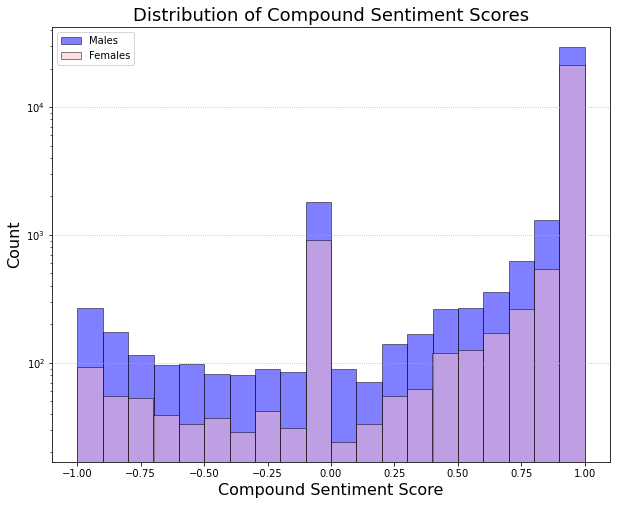

In [48]:
plt.figure(figsize=(10, 8))
plt.hist(df_cleaned[df_cleaned['sex'] =='m']['compound'], bins=20, log = True, color='blue', edgecolor='black', alpha=0.5, label="Males")
plt.hist(df_cleaned[df_cleaned['sex'] =='f']['compound'], bins=20, log = True, color='pink', edgecolor='black', alpha=0.5, label="Females")
plt.title('Distribution of Compound Sentiment Scores', fontsize=18)
plt.xlabel('Compound Sentiment Score', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.grid(axis='y', linestyle=':')
plt.legend()
plt.show()

### Selecting data for the model

In order for the algorithm to use the information in the dataframe, it needs to be in the right format.  Let's check some of the numbers.

In [49]:
df_cleaned.describe()

,age,height,income,has pets,neg,neu,pos,compound
count,59946.000000,59943.000000,11504.000000,59946.000000,59946.000000,59946.000000,59946.000000,59946.000000
mean,32.340290,68.295281,104394.993046,0.263020,0.046967,0.698784,0.218666,0.878526
std,9.452779,3.994803,201433.528307,0.492973,0.037667,0.154934,0.091832,0.335960
min,18.000000,1.000000,20000.000000,0.000000,0.000000,0.000000,0.000000,-0.999300
25%,26.000000,66.000000,20000.000000,0.000000,0.021000,0.673000,0.168000,0.973300
50%,30.000000,68.000000,50000.000000,0.000000,0.042000,0.723000,0.218000,0.994800
75%,37.000000,71.000000,100000.000000,0.000000,0.067000,0.769000,0.272000,0.998400
max,110.000000,95.000000,1000000.000000,2.000000,1.000000,1.000000,1.000000,1.000000


We need to scale age and height, and it looks like there are 2s in the `has pets`. We need that to be a 1 because we need to figure out 'yes' or 'no'.

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_cleaned[['age', 'height']] = scaler.fit_transform(df_cleaned[['age', 'height']])

In [51]:
df_cleaned['has pets'] = df_cleaned['has pets'].replace(2,1)

In [52]:
# columns to keep in the dataframe.
cleaned_columns = ['has pets', 'age', 'sex', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'height', 'job', 'offspring', 'orientation', 'religion', 'sign', 'smokes', 'compound']

# features we want to transform to determine if someone has pets.
dummies_features = ['has pets', 'sex', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'job', 'offspring', 'orientation', 'religion', 'sign', 'smokes']

In [53]:
# create dummy variables for the pet model in a new pet dataframe
pets_df = df_cleaned[cleaned_columns].dropna()

for feature in dummies_features[1:]:
    pets_df = pd.get_dummies(pets_df, columns=[feature], prefix=[feature], dtype=int)

In [54]:
pets_df.head()

,has pets,age,height,compound,sex_f,sex_m,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,body_type_skinny,body_type_thin,body_type_used up,diet_anything,diet_halal,diet_kosher,diet_other,diet_vegan,diet_vegetarian,drinks_desperately,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,drinks_very often,drugs_never,drugs_often,drugs_sometimes,education_college/university,education_dropped out of college/university,education_dropped out of high school,education_dropped out of law school,education_dropped out of masters program,education_dropped out of med school,education_dropped out of ph.d program,education_dropped out of space camp,education_dropped out of two-year college,education_graduated from college/university,education_graduated from high school,education_graduated from law school,education_graduated from masters program,education_graduated from med school,education_graduated from ph.d program,education_graduated from space camp,education_graduated from two-year college,education_high school,education_law school,education_masters program,education_med school,education_ph.d program,education_space camp,education_two-year college,education_working on college/university,education_working on high school,education_working on law school,education_working on masters program,education_working on med school,education_working on ph.d program,education_working on space camp,education_working on two-year college,job_artistic / musical / writer,job_banking / financial / real estate,job_clerical / administrative,job_computer / hardware / software,job_construction / craftsmanship,job_education / academia,job_entertainment / media,job_executive / management,job_hospitality / travel,job_law / legal services,job_medicine / health,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed,offspring_doesn't have kids,"offspring_doesn't have kids, and doesn't want any","offspring_doesn't have kids, but might want them","offspring_doesn't have kids, but wants them",offspring_doesn't want kids,offspring_has a kid,"offspring_has a kid, and might want more","offspring_has a kid, and wants more","offspring_has a kid, but doesn't want more",offspring_has kids,"offspring_has kids, and might want more","offspring_has kids, and wants more","offspring_has kids, but doesn't want more",offspring_might want kids,offspring_wants kids,orientation_bisexual,orientation_gay,orientation_straight,religion_agnosticism,religion_atheism,religion_buddhism,religion_catholicism,religion_christianity,religion_hinduism,religion_islam,religion_judaism,religion_other,sign_aquarius,sign_aries,sign_cancer,sign_capricorn,sign_gemini,sign_leo,sign_libra,sign_pisces,sign_sagittarius,sign_scorpio,sign_taurus,sign_virgo,smokes_no,smokes_sometimes,smokes_trying to quit,smokes_when drinking,smokes_yes
0,0,-1.093898,1.678374,0.9960,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0.281370,0.426738,0.9925,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,0,-0.141789,-0.824899,0.9819,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
14,1,-0.353369,-1.575881,0.9982,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1

In [55]:
pets_df.shape

(8858, 130)

### Modeling with Logistic Regression

After creating an algorithm capable of making classifications, we split the data into training and test sets.

1. Training set - the data the algorithm learns from
2. Validation set - the points in this set are used to compute the accuracy or error of the classifier.
3. Accuracy, recall, precision, and f1 score - how well your model performed.
4. Tune model (eg, adjust k in k-nearest)
5. Testing set - the data that was set aside to test your model.

Training, validation, and testing test the effectiveness of your algorithm.

Now that our data is cleaned and in a form we can work with, it's time to separate our data into training and testing sets.  

In [56]:
# Training set - the data your algorithm learns from

from sklearn.model_selection import train_test_split

X = pets_df.iloc[:, 1:]
y = pets_df['has pets'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

Then we use a model and fit it with our training data.

In [57]:
from sklearn.linear_model import LogisticRegression

pets_lr = LogisticRegression(max_iter=1000)
pets_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

We validate the predictions.

In [58]:
# validation set - the points in this set are used to compute the accuracy or error of the classifier.
pets_predictions = pets_lr.predict(X_test)

In [59]:
# accuracy, recall, precision, and f1 score
from sklearn.metrics import classification_report
print(classification_report(y_test, pets_predictions))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81      1549
           1       0.47      0.12      0.19       666

    accuracy                           0.70      2215
   macro avg       0.59      0.53      0.50      2215
weighted avg       0.64      0.70      0.62      2215



So, we have 81% accuracy predicting if someone *doesn't* have a pet, and only 19% accuracy predicting they do. This means we can't accurately predict whether someone has a pet based on the other features in the dataset.

To visualize this information, I found the following plot code at https://github.com/arkmalcom/date-a-scientist, and it shows the coefficients in graphic form.

In [60]:
odds = np.exp(pets_lr.coef_[0])
lr_df = pd.DataFrame(odds, X.columns, columns=['coef']).sort_values(by='coef', ascending=False)
print(lr_df)

                                           coef
education_space camp                   2.871688
education_working on high school       2.592117
body_type_jacked                       2.118757
education_working on two-year college  1.835754
offspring_might want kids              1.739108
...                                         ...
education_masters program              0.488745
body_type_rather not say               0.467066
diet_halal                             0.455884
education_working on law school        0.422215
religion_hinduism                      0.335766

[129 rows x 1 columns]


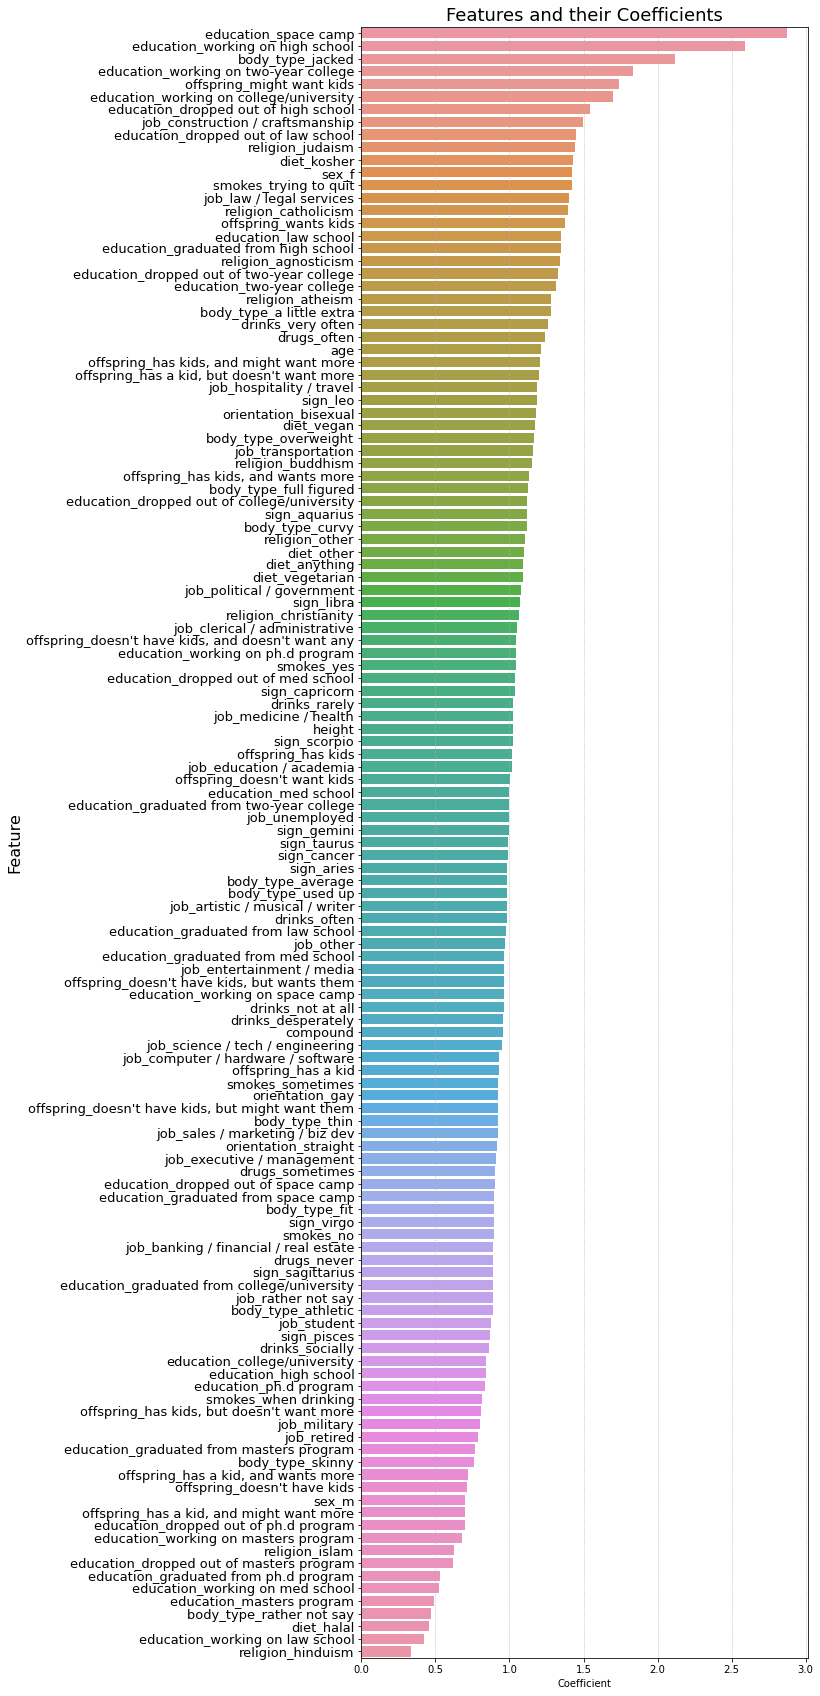

In [61]:
plt.figure(figsize=(8,30))
sns.barplot(data=lr_df, y=lr_df.index, x=lr_df.coef)
plt.title('Features and their Coefficients', fontsize=18)
plt.xlabel('Coefficient')
plt.ylabel('Feature', fontsize=16)
plt.yticks(fontsize=13)
plt.grid(axis='x', linestyle=':')
plt.show()

[[1462   87]
 [ 588   78]]


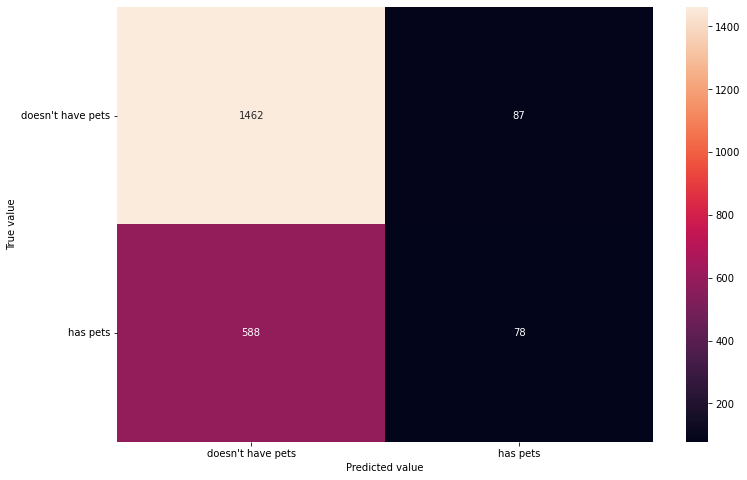

In [62]:
from sklearn.metrics import confusion_matrix

pets_cm = confusion_matrix(y_test, pets_predictions)
print(pets_cm)

plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(pets_cm, annot=True, ax = ax,fmt="d")
ax.set_xlabel("Predicted value")
ax.set_ylabel("True value")
ax.set_xticklabels(["doesn't have pets", "has pets"])
ax.set_yticklabels(["doesn't have pets", "has pets"], rotation=360)
plt.show()


| Negative | Positive |
|:--------:|:--------:|
|True      |False     |
|False     |True      |

We'd like to have the diagonal True Negaives and True Positives be as high as possible, and we don't.

Can we use a different model and get better results? K Nearest Neighbors is less accurate, but does a slightly better job predicting if someone has pets.

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_pet_predictions = knn_clf.predict(X_test)
print(classification_report(y_test, knn_pet_predictions))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78      1549
           1       0.39      0.22      0.28       666

    accuracy                           0.66      2215
   macro avg       0.55      0.54      0.53      2215
weighted avg       0.62      0.66      0.63      2215



## Conclusion

Based on the information in this dataset, we can't predict with confidence whether someone has pets.  We *may* be able to guess that someone who's been to space camp (is that real or are they joking?) is likely to have pets. Or if you are working on your high school diploma or work in construction. And people who describe themselves as jacked may have a pet to help get them out of the house and be active.  One of the trends we saw early in the data - women are more likely to have pets - is supported by the model, as well.

## Next steps

Other data we may look at is can we predict whether someone wants children? Or delve deeper into NLP and see in more detail how people talk about themselves and whether it's positive or negative. 

It would be nice to have data included on what users made matches, and how well both parties liked the match.  That could provide a wealth of information for potential OkCupid users. 